# (2주차) Ch3 백터 응용 : 데이터 분석에서의 벡터

## Ch3.1 상관관계와 코사인 유사도

## Ch3.2 시계열 필터링과 특징 탐지

## Ch3.3 k-평균 클러스터링

In [ ]:
# step1 데이터 공간에서 임의 kro 중심점을 초기화 (중심 : 클래스or범주, 임의의 차원의 수로 일반화된 형태)
# [그림 3-3] 왼쪽 상단 그림
# data 변수 : 150개의 관측치와 2개의 특징 (150*2 형태)
import numpy as np
k=3
ridx = np.random.choice(range(len(data)), k, replace=False)
centroids = data[ridx, :]

In [ ]:
# step2 각 데이터 관측치와 각 중심 사이의 유클리드 거리를 계산
# cent-roids[ci,:] : 1*2(특징별 군집 ci)
dists = np.zeros((data.shape[0],k))
for ci in range(k):
  dists[:,ci] = np.sum((data-centroids[ci,:])**2, axis=1)

In [ ]:
# step3 각 데이터 관측치를 가장 가까운 중심의 그룹에 할당
groupidx = np.argmin(dists, axis=1)



*   np.min      # 최솟값을 반환
*   np.argmin   # 최솟값의 인덱스를 반환



In [ ]:
# step4 각 중심을 해당 중심에 할당된 모든 데이터 관측치의 평균으로 갱신
for ki in range(k) :
  centroids[ki, :] = [np.mean(data[groupidx==ki,0]),
                      np.mean(data[groupidx==ki,1])]

In [ ]:
# step5 수렴 기준을 만족할 때(or N회)까지 step2~4 반복

# Ch3 상관관계 연습문제

**[연습 문제 3-1]**

두 벡터를 입력으로 받아 두 개의 수를 출력하는 파이썬 함수를 작성해라.

두 개의 수는 피어슨 상관계수와 코사인 유사도이다.

Ch.3 에 제시한 공식을 따라서 코드를 작성해라.

(단순히 np.corrcoef와 spatial.distance.cosine을 호출하지마라.)

변수들이 이미 평균중심화되어 있다면 두 출력 결과가 동일하고, 그렇지 않다면 결과가 서로 다른지 확인하여라.

In [1]:
# 피어슨 상관계수 함수
def pearson_correlation(x, y):
    # 벡터의 평균을 구함
    mean_x = sum(x) / len(x)
    mean_y = sum(y) / len(y)

    # 분자: 편차 곱의 합
    numerator = sum((xi - mean_x) * (yi - mean_y) for xi, yi in zip(x, y))

    # 분모: 각 벡터의 편차 제곱의 합을 더하고 제곱근을 구함
    denominator_x = sum((xi - mean_x) ** 2 for xi in x) ** 0.5
    denominator_y = sum((yi - mean_y) ** 2 for yi in y) ** 0.5

    # 분모가 0이 되는 경우를 대비하여 작은 값으로 설정
    if denominator_x * denominator_y == 0:
        return 0

    return numerator / (denominator_x * denominator_y)

# 코사인 유사도 함수
def cosine_similarity(x, y):
    # 벡터 내적 계산
    dot_product = sum(xi * yi for xi, yi in zip(x, y))

    # 벡터 크기(노름) 계산
    norm_x = sum(xi**2 for xi in x) ** 0.5
    norm_y = sum(yi**2 for yi in y) ** 0.5

    # 분모가 0이 되는 경우를 대비하여 작은 값으로 설정
    if norm_x * norm_y == 0:
        return 0

    return dot_product / (norm_x * norm_y)

# 두 벡터 예시
x = [1, 2, 3]
y = [4, 5, 6]

# 피어슨 상관계수와 코사인 유사도 계산
pearson = pearson_correlation(x, y)
cosine = cosine_similarity(x, y)

# 결과 출력
print("피어슨 상관계수:", pearson)
print("코사인 유사도:", cosine)

# 평균 중심화 여부에 따라 결과 비교
if abs(pearson - cosine) < 1e-6:
    print("벡터들이 평균 중심화 되어있습니다. 두 값이 동일합니다.")
else:
    print("벡터들이 평균 중심화되지 않았습니다. 두 값이 다릅니다.")

피어슨 상관계수: 0.9999999999999998
코사인 유사도: 0.9746318461970762
벡터들이 평균 중심화되지 않았습니다. 두 값이 다릅니다.


**[연습 문제 3-2]**

0에서 3까지의 정수를 가진 변수와 이 변수에 특정 오프셋을 더한 두 번째 변수를 만들어라.

시스템적으로 오프셋을 -50에서 +50까지 변경하는 시뮬레이션을 만들어라.

(즉, 시뮬레이션의 첫번째 반복에서는 두번째 변수가 [-50,-49,-48,-47]이 된다.)

for 루프에서 두 변수간의 상관관계와 코사인 유사도를 계산하고 결과를 저장하라.

그리고 평균 오프셋이 상관관계와 코사인 유사성에 어떻게 영향을 주는지 보여주는 선 그래프를 그려라.

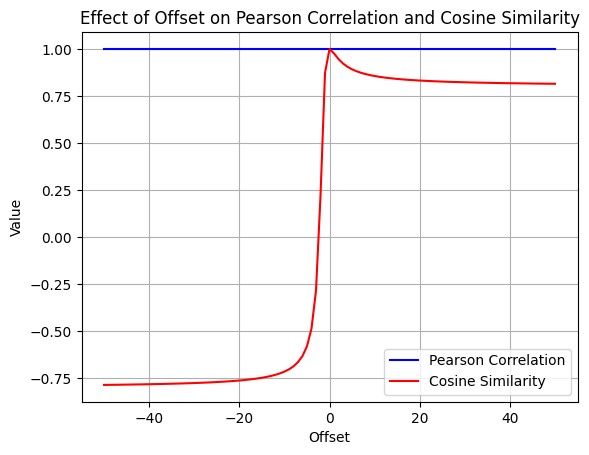

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 첫 번째 변수 (고정된 값)
x = [0, 1, 2, 3]

# 오프셋 값 범위 설정 (-50부터 50까지)
offsets = range(-50, 51)

# 결과 저장을 위한 리스트
pearson_results = []
cosine_results = []

# 오프셋을 -50부터 50까지 변화시키면서 상관계수와 유사도를 계산
for offset in offsets:
    # 두 번째 변수 (오프셋을 더한 값)
    y = [xi + offset for xi in x]

    # 피어슨 상관계수 계산
    pearson = pearson_correlation(x, y)
    pearson_results.append(pearson)

    # 코사인 유사도 계산
    cosine = cosine_similarity(x, y)
    cosine_results.append(cosine)

# 그래프 그리기
plt.plot(offsets, pearson_results, label='Pearson Correlation', color='blue')
plt.plot(offsets, cosine_results, label='Cosine Similarity', color='red')
plt.xlabel('Offset')
plt.ylabel('Value')
plt.title('Effect of Offset on Pearson Correlation and Cosine Similarity')
plt.legend()
plt.grid(True)
plt.show()